In [1]:
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt  #Library for visualization

from sklearn import datasets

iris = datasets.load_iris()
X_w = iris.data[:, :2]  #load the first two features of the iris data 
y_w = iris.target         #load the target of the iris data

#select only the first two classes for both the feature set and target set
#the first two classes of the iris dataset: Setosa (0), Versicolour (1)

X = X_w[y_w < 2]   
y = y_w[y_w < 2]

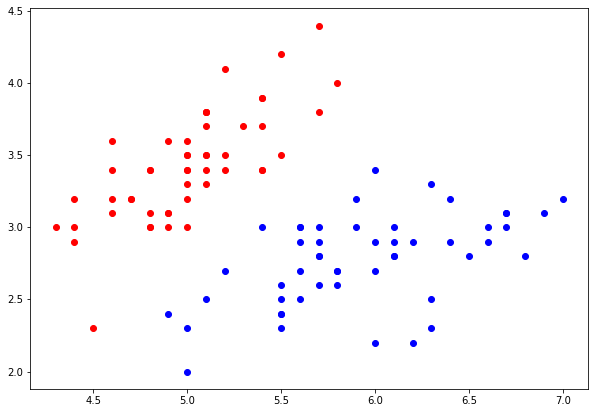

In [2]:
X_0 = X[y == 0]
X_1 = X[y == 1]
#to visualize within IPython
%matplotlib inline            
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [4]:
from sklearn.svm import SVC

svm_inst = SVC(kernel='linear')
svm_inst.fit(X_train,y_train)
y_pred = svm_inst.predict(X_test)

Text(0.5, 1.0, 'Linearly-separated classes')

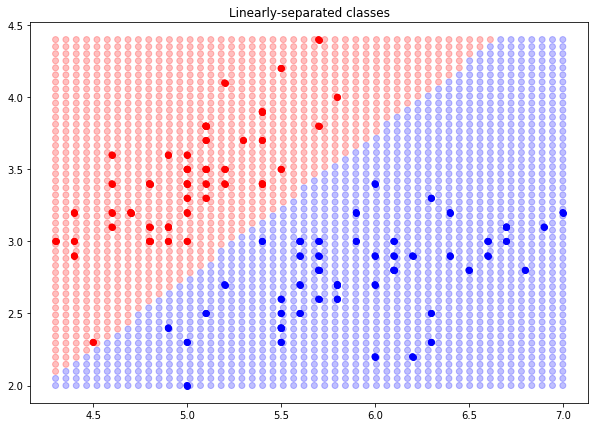

In [40]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = svm_inst.predict(test_points)


X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

colors = np.array(['r', 'b'])
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Linearly-separated classes")

In [9]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 7).fit(X_train, y_train)

Text(0.5, 1.0, 'Linear Regression')

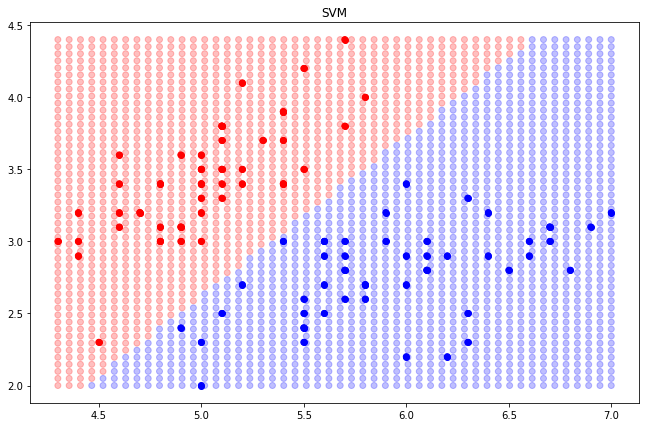

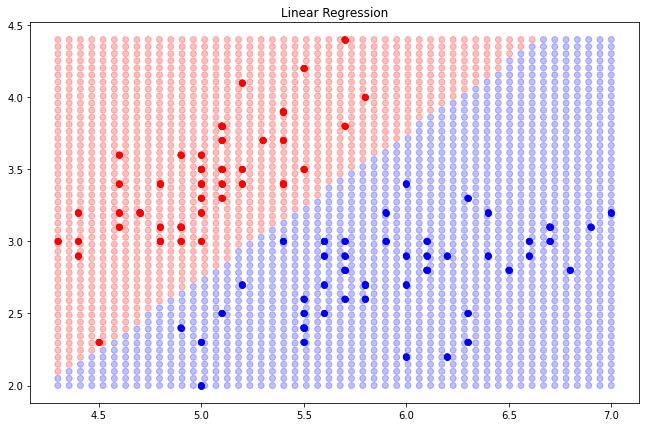

In [74]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

#Predictions on the grid
test_preds = lr_clf.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline
#plt.figure(figsize=(10,7))   #change figure-size for easier viewing

#fig = plt.figure()
fig = plt.figure(figsize=(24,7))
ax1 = fig.add_subplot(1, 2, 1)
#fig, ax1 = plt.subplots(1,2,1,figsize=(15,15))
# plt.subplot(211)
ax1.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax1.scatter(X_1[:,0],X_1[:,1], color = 'blue')

colors = np.array(['r', 'b'])
ax1.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
ax1.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("SVM")

#Predictions on the grid
test_preds = svm_inst.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

#plt.figure(figsize=(10,7))   #change figure-size for easier viewing

#plt.subplot(212)
fig = plt.figure(figsize=(24,7))
#fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 1)

ax2.scatter(X_0[:,0],X_0[:,1], color = 'red')
ax2.scatter(X_1[:,0],X_1[:,1], color = 'blue')

colors = np.array(['r', 'b'])
ax2.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
ax2.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Linear Regression")

#fig.tight_layout()
#fig.show()